# Lesson 2: Understanding and Implementing Distance Metrics in Hierarchical Clustering

Here's a cleaned-up version of the markdown content you provided, formatted for better readability and structure:

```markdown
# Introduction
Welcome to our lesson on distance metrics in hierarchical clustering! Today, we will delve into the definition and importance of distance metrics, particularly in hierarchical clustering. You will learn about various types of distance metrics such as Euclidean, Manhattan, and Cosine Distance, and how to implement these in Python. After this, we will examine the impact of these distance measures on the resulting hierarchical clustering.

## Introduction to Distance Metrics
Distance metrics are essentially measures used in mathematics to calculate the 'distance' between two points. In the context of clustering, we're interested in the distance between data points in our dataset or the distance between clusters of points. We often use metrics like Euclidean distance, Manhattan distance, and Cosine Distance, each with its unique set of characteristics and application scenarios.

### Implementing Distance Metrics in Python: Euclidean Distance
The Euclidean distance, often referred to as the straight-line distance between two points in a Euclidean plane, is one of the most commonly used distance metrics in machine learning. Below is the formula and Python implementation of it.

```python
import math

# Euclidean Distance Metric
def euclidean_distance(point1, point2):
    return math.sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(point1, point2)))
```

### Implementing Distance Metrics in Python: Manhattan Distance
The Manhattan distance gets its name from the block-like geographical layout of the Manhattan borough of New York City. The Manhattan distance between two points is the sum of the absolute differences of their coordinates. Here's the Python code for calculating Manhattan distance:

```python
# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))
```

### Implementing Distance Metrics in Python: Cosine Distance
The third type of distance metric that we will examine today is Cosine distance, but first let's understand the Cosine similarity. Unlike the other two, Cosine similarity measures the cosine of the angle between two vectors, which can be useful in certain multi-dimensional and text classification problems. From that we can calculate the Cosine Distance as \(1 - \text{Cosine Similarity}\). Here's the formula and Python function for calculating Cosine Distance:

```python
import numpy as np

# Cosine Distance Metric
def cosine_distance(point1, point2):
    return 1 - np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
```

## Implementing Hierarchical Clustering
Next, we'll see how hierarchical clustering aims to separate the dataset into clusters. The distance metric plays a key role in this process, determining the 'distance' or dissimilarity between data points. Let's tweak the agglomerative hierarchical clustering algorithm to incorporate different distance metrics as a parameter.

Here's the Python code for the agglomerative clustering algorithm:

```python
import numpy as np

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = [distance_metric(X[k], X[l]) for k in clusters[i] for l in clusters[j]]
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters[idx2])
        clusters.pop(idx2)
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels
```

## Studying the Impact of Distance Metrics
Let's first define the dataset that we will use for the clustering:

```python
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
dataset = load_iris().data

# Scale the dataset with StandardScaler
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)
```

Next, we can perform clustering with different distance methods:

```python
# Perform Agglomerative Clustering
n_clusters = 3

# Euclidean Distance
labels_euc = agglomerative_clustering(dataset, n_clusters, euclidean_distance)

# Manhattan Distance
labels_man = agglomerative_clustering(dataset, n_clusters, manhattan_distance)

# Cosine Distance
labels_cos = agglomerative_clustering(dataset, n_clusters, cosine_distance)
```

Lastly, we will understand how different distance measures can affect the result of hierarchical clustering. Let's visualize clustering results:

```python
# Plot the results in 3 subplots for each distance metric
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Euclidean Distance
axs[0].scatter(dataset[:, 0], dataset[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Sepal Length')
axs[0].set_ylabel('Sepal Width')

# Manhattan Distance
axs[1].scatter(dataset[:, 0], dataset[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Sepal Length')
axs[1].set_ylabel('Sepal Width')

# Cosine Distance
axs[2].scatter(dataset[:, 0], dataset[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Sepal Length')
axs[2].set_ylabel('Sepal Width')

plt.show()
```

## Configuring Distance Metrics with Sklearn
Similarly, we can set different distance metrics when using Sklearn's AgglomerativeClustering model. Let's try it out.

```python
from sklearn.cluster import AgglomerativeClustering

# Agglomerative Clustering using sklearn with euclidean distance.
model_euc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean')
labels_euc = model_euc.fit_predict(dataset)

# Agglomerative Clustering using sklearn with manhattan.
model_man = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='average')
labels_man = model_man.fit_predict(dataset)

# Agglomerative Clustering using sklearn with cosine distance.
model_cos = AgglomerativeClustering(n_clusters=n_clusters, metric='cosine', linkage='average')
labels_cos = model_cos.fit_predict(dataset)
```

## Lesson Summary and Practice
Excellent work! You've just mastered the concepts and the importance of distance metrics in hierarchical clustering. You've implemented these metrics in Python and applied them in the agglomerative clustering algorithm. In the end, you studied the impact of these distance metrics on the clustering results. Next, get ready to solidify this knowledge through related exercises!
```

This markdown is now better structured with headers and code blocks properly formatted, making it easier to follow and understand.



## Clustering Constellations: Observing Distance Metrics in Action

Have you ever wondered how libraries decide to place different books into clusters? Let's explore this concept using our dataset, where we'll group data points using Cosine Distance. Run the code to see how our data is clustered.

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset
sample_data = make_blobs(n_samples=100, centers=2, n_features=3, cluster_std=0.5, center_box=(-0.8, 0.8), random_state=42)[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset
sample_data = make_blobs(n_samples=100, centers=2, n_features=3, cluster_std=0.5, center_box=(-0.8, 0.8), random_state=42)[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Agglomerative Clustering with Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Exploring Feature Space with Clustering Visualization

Stellar Navigator, your next mission is to understand the influence of distance metrics on the clustering outcome. To do this, you'll need to modify the metric parameter of the AgglomerativeClustering model in the code. Select the 'euclidean' distance metric instead. Ignore the linkage parameter at this time, we will explore it later!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

Stellar Navigator, your next mission is to understand the influence of distance metrics on the clustering outcome. To do this, you'll need to modify the metric parameter of the AgglomerativeClustering model in the code. Select the 'euclidean' distance metric instead. Ignore the linkage parameter at this time, we will explore it later!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

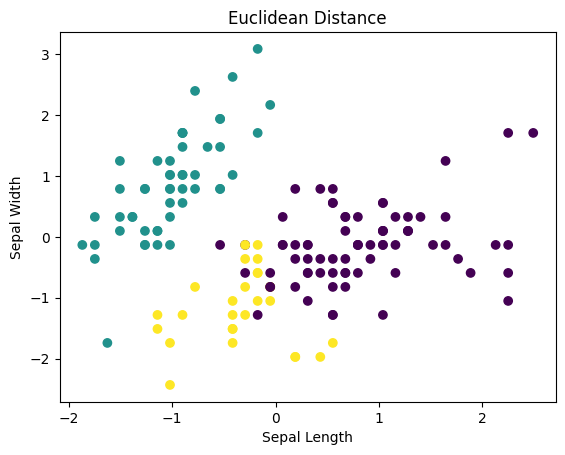

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


## Distance Metric Transformation

Stellar Navigator, your next mission is to understand the influence of distance metrics on the clustering outcome. To do this, you'll need to modify the metric parameter of the AgglomerativeClustering model in the code. Select the 'euclidean' distance metric instead. Ignore the linkage parameter at this time, we will explore it later!

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# Load and scale the Iris dataset
dataset = load_iris().data
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

# Define the number of clusters
n_clusters = 3

# Initialize one AgglomerativeClustering model with 'euclidean' distance metric
model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean')

# Fit the model and get the labels
labels = model.fit_predict(dataset)

# Plot the results using the first and second features of the dataset
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis')
plt.title('Euclidean Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


```

## Implementing Distance Measures in Clustering

You've learned about different distance metrics and their impacts. Now, modify the starter code to use the Cosine distance instead.

Are you ready for this small but significant boost in your space journey?

```py

# Exercise

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(point1 - point2))

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset with 3 close clusters and center_box parameter
sample_data = make_blobs(n_samples=150, centers=2, n_features=3, cluster_std=0.5, random_state=0, center_box=(-2, 2))[0]

# Perform Agglomerative Clustering
labels_cosine = agglomerative_clustering(sample_data, 2, manhattan_distance)

# Plot the results
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Manhattan Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


```

To modify the provided code to use the Cosine distance metric for clustering, you need to adjust the function call within the `agglomerative_clustering` function to use `cosine_distance` instead of `manhattan_distance`. Additionally, the plot title should be updated to reflect that Cosine distance is being used. Here's the updated version of your code:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(point1 - point2))

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset with 3 close clusters and center_box parameter
sample_data = make_blobs(n_samples=150, centers=2, n_features=3, cluster_std=0.5, random_state=0, center_box=(-2, 2))[0]

# Perform Agglomerative Clustering using Cosine Distance
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

# Plot the results
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
```

This code now correctly uses the `cosine_distance` function for calculating distances between clusters in the `agglomerative_clustering` function. The plot title has also been updated to "Cosine Distance" to accurately reflect the metric used in the visualization.

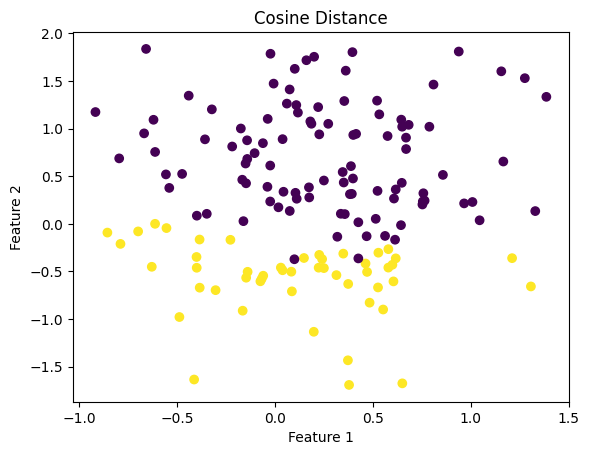

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    return sum(abs(point1 - point2))

# Cosine Distance Metric
def cosine_distance(point1, point2):
    similarity = np.dot(point1, point2) / (np.linalg.norm(point1) * np.linalg.norm(point2))
    return 1 - similarity

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Agglomerative Clustering Function
def agglomerative_clustering(X, n_clusters, distance_metric):
    clusters = [[i] for i in range(len(X))]
    while len(clusters) > n_clusters:
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        clusters[idx1].extend(clusters.pop(idx2))
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label
    return labels

# Sample dataset with 3 close clusters and center_box parameter
sample_data = make_blobs(n_samples=150, centers=2, n_features=3, cluster_std=0.5, random_state=0, center_box=(-2, 2))[0]

# Perform Agglomerative Clustering using Cosine Distance
labels_cosine = agglomerative_clustering(sample_data, 2, cosine_distance)

# Plot the results
plt.scatter(sample_data[:, 0], sample_data[:, 1], c=labels_cosine, cmap='viridis')
plt.title('Cosine Distance')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Charting the Cosmic Distances

Great strides, Space Voyager! Your next challenge awaits: implementing a distance measure for clustering. Remember, in space, as in datasets, the way we measure distance can reveal new constellations of insights. Can you define a function that calculates the distance between stars... I mean, data points?

```py
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    # TODO: Complete the code to calculate and return the manhattan distance
    
# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters, distance_metric):
    # Initialize each data point as its own cluster
    clusters = [[i] for i in range(len(X))]

    # Continue clustering until the desired number of clusters is reached
    while len(clusters) > n_clusters:
        # Calculate the distance matrix
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)

        # Find the pair of clusters with the minimum distance without np
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        # Merge these two closest clusters
        clusters[idx1].extend(clusters[idx2])
        # Remove the merged cluster from the list of clusters
        clusters.pop(idx2)

    # Create an array to hold the cluster labels for each data point
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label

    return labels

# Load and preprocess the dataset
dataset = StandardScaler().fit_transform(load_iris().data)

# Perform Agglomerative Clustering with different distance metrics
labels_man = agglomerative_clustering(dataset, 3, manhattan_distance)

# Plot the results
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels_man, cmap='viridis')
plt.title('Agglomerative Clustering with Manhattan Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

```

To complete the challenge, let's define the `manhattan_distance` function that calculates the Manhattan distance between two data points. The Manhattan distance, also known as the L1 norm or taxicab norm, is the sum of the absolute differences of their Cartesian coordinates.

Here's the completed code with the `manhattan_distance` function implemented:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    # Calculate and return the Manhattan distance
    return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters, distance_metric):
    # Initialize each data point as its own cluster
    clusters = [[i] for i in range(len(X))]

    # Continue clustering until the desired number of clusters is reached
    while len(clusters) > n_clusters:
        # Calculate the distance matrix
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)

        # Find the pair of clusters with the minimum distance
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        # Merge these two closest clusters
        clusters[idx1].extend(clusters.pop(idx2))

    # Create an array to hold the cluster labels for each data point
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label

    return labels

# Load and preprocess the dataset
dataset = StandardScaler().fit_transform(load_iris().data)

# Perform Agglomerative Clustering with Manhattan distance
labels_man = agglomerative_clustering(dataset, 3, manhattan_distance)

# Plot the results
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels_man, cmap='viridis')
plt.title('Agglomerative Clustering with Manhattan Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()
```

This code now includes a fully functional `manhattan_distance` function that computes the Manhattan distance between two points. The `agglomerative_clustering` function uses this metric to perform hierarchical clustering on the Iris dataset, and the results are visualized using a scatter plot. This setup helps you explore the influence of the Manhattan distance on the clustering outcome.

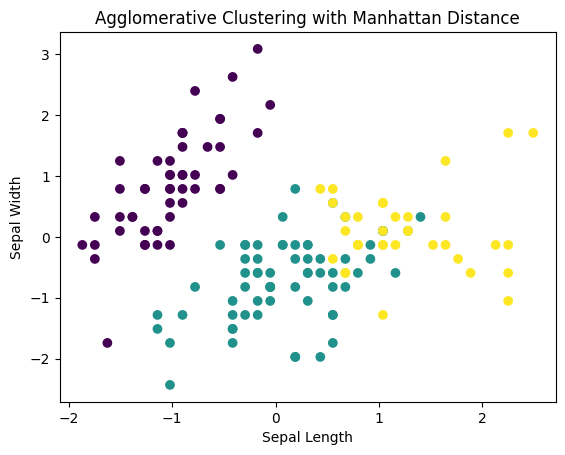

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Manhattan Distance Metric
def manhattan_distance(point1, point2):
    # Calculate and return the Manhattan distance
    return sum(abs(p1 - p2) for p1, p2 in zip(point1, point2))

# Function to calculate the distance matrix
def calculate_distance_matrix(X, clusters, distance_metric):
    # Initialize distance matrix
    dist_matrix = np.zeros((len(clusters), len(clusters)))
    # Compute the distance between each pair of clusters
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            dists = []
            for k in clusters[i]:
                for l in clusters[j]:
                    dists.append(distance_metric(X[k], X[l]))
            dist_matrix[i, j] = dist_matrix[j, i] = np.mean(dists)
    return dist_matrix

# Define the Hierarchical Clustering (Agglomerative) function
def agglomerative_clustering(X, n_clusters, distance_metric):
    # Initialize each data point as its own cluster
    clusters = [[i] for i in range(len(X))]

    # Continue clustering until the desired number of clusters is reached
    while len(clusters) > n_clusters:
        # Calculate the distance matrix
        dist_matrix = calculate_distance_matrix(X, clusters, distance_metric)

        # Find the pair of clusters with the minimum distance
        min_dist = float('inf')
        for i in range(len(clusters)):
            for j in range(i+1, len(clusters)):
                if dist_matrix[i, j] < min_dist:
                    min_dist = dist_matrix[i, j]
                    idx1, idx2 = i, j
        # Merge these two closest clusters
        clusters[idx1].extend(clusters.pop(idx2))

    # Create an array to hold the cluster labels for each data point
    labels = np.empty(len(X), dtype=int)
    for label, cluster in enumerate(clusters):
        for i in cluster:
            labels[i] = label

    return labels

# Load and preprocess the dataset
dataset = StandardScaler().fit_transform(load_iris().data)

# Perform Agglomerative Clustering with Manhattan distance
labels_man = agglomerative_clustering(dataset, 3, manhattan_distance)

# Plot the results
plt.scatter(dataset[:, 0], dataset[:, 1], c=labels_man, cmap='viridis')
plt.title('Agglomerative Clustering with Manhattan Distance')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

Stellar Navigator, your mission as Space Voyager is to navigate the vastness of data using the power of Sklearn's AgglomerativeClustering. Follow the TODO comments for detailed instructions.

Note: The TODO comments ask for setting the linkage parameter, which we will explore in the upcoming les

```py
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the sample data
X, _ = make_blobs(n_samples=50, centers=3, n_features=2, center_box=(-2, 2), random_state=42)

# Perform Agglomerative Clustering with Sklearn
n_clusters = 3
# TODO: Create an instance of AgglomerativeClustering with the 'euclidean' metric and set linkage to 'average'
# TODO: Create an instance of AgglomerativeClustering with the 'manhattan' metric and set linkage to 'average'
# TODO: Create an instance of AgglomerativeClustering with the 'cosine' metric and set linkage to 'average'

# TODO: Calculate the cluster labels for each distance metric

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[2].scatter(X[:, 0], X[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()

```


To complete your mission of exploring different distance metrics using Sklearn's `AgglomerativeClustering`, you need to create instances of the clustering model with specified metrics and linkage parameters, calculate the cluster labels, and then plot the results. Here's how you can fulfill the TODO tasks:

```python
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the sample data
X, _ = make_blobs(n_samples=50, centers=3, n_features=2, center_box=(-2, 2), random_state=42)

# Perform Agglomerative Clustering with Sklearn
n_clusters = 3
# Create an instance of AgglomerativeClustering with the 'euclidean' metric and set linkage to 'average'
model_euc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
# Create an instance of AgglomerativeClustering with the 'manhattan' metric and set linkage to 'average'
model_man = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='average')
# Create an instance of AgglomerativeClustering with the 'cosine' metric and set linkage to 'average'
model_cos = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')

# Calculate the cluster labels for each distance metric
labels_euc = model_euc.fit_predict(X)
labels_man = model_man.fit_predict(X)
labels_cos = model_cos.fit_predict(X)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[2].scatter(X[:, 0], X[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()
```

### Explanation:
1. **Model Creation**: Three instances of `AgglomerativeClustering` are created, each using a different distance metric (`euclidean`, `manhattan`, and `cosine`). The `affinity` parameter is set according to the metric, and the `linkage` is set to `'average'` for all instances as specified.
  
2. **Label Calculation**: The `fit_predict` method is used for each model to calculate the cluster labels based on the respective distance metrics.

3. **Plotting**: The results are plotted in three subplots, each showing the clustering outcome using different distance metrics. This visualization helps in comparing how the choice of distance metric affects the clustering.

This setup allows you to visually assess the impact of different distance metrics on the clustering results, fulfilling the mission objectives and providing insights into data structure as seen through different lenses of similarity measures.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate the sample data
X, _ = make_blobs(n_samples=50, centers=3, n_features=2, center_box=(-2, 2), random_state=42)

# Perform Agglomerative Clustering with Sklearn
n_clusters = 3
# Create an instance of AgglomerativeClustering with the 'euclidean' metric and set linkage to 'average'
model_euc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='average')
# Create an instance of AgglomerativeClustering with the 'manhattan' metric and set linkage to 'average'
model_man = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='average')
# Create an instance of AgglomerativeClustering with the 'cosine' metric and set linkage to 'average'
model_cos = AgglomerativeClustering(n_clusters=n_clusters, affinity='cosine', linkage='average')

# Calculate the cluster labels for each distance metric
labels_euc = model_euc.fit_predict(X)
labels_man = model_man.fit_predict(X)
labels_cos = model_cos.fit_predict(X)

# Plot the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(X[:, 0], X[:, 1], c=labels_euc, cmap='viridis')
axs[0].set_title('Euclidean Distance')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].scatter(X[:, 0], X[:, 1], c=labels_man, cmap='viridis')
axs[1].set_title('Manhattan Distance')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

axs[2].scatter(X[:, 0], X[:, 1], c=labels_cos, cmap='viridis')
axs[2].set_title('Cosine Distance')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

plt.show()

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'